In [14]:
import pandas as pd

import numpy as np
import math

In [15]:
df = pd.read_csv('uncleaned_alzheimers_disease_data.csv')


In [16]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751.0,NaN,0.0,0.0,2.0,22.927749,NaN,13.297218,6.327112,1.347214,...,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,NaN,XXXCONFID
1,4752.0,89.0,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,4753.0,73.0,0.0,3.0,1.0,17.795882,0.0,19.555085,NaN,1.826335,...,0.0,0.0,7.119548,NaN,1.0,0.0,1.0,0.0,0.0,xxxconfid
3,4754.0,NaN,1.0,NaN,1.0,33.800817,1.0,12.209266,8.428001,7.435604,...,0.0,NaN,6.481226,0.0,NaN,NaN,0.0,0.0,NaN,xxxconfid
4,4755.0,89.0,0.0,0.0,0.0,20.716974,NaN,18.454356,6.310461,0.795498,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID
5,4756.0,86.0,NaN,1.0,1.0,30.626886,NaN,NaN,NaN,1.584922,...,0.0,0.0,9.015686,1.0,0.0,0.0,0.0,0.0,0.0,XXXCONFID
6,4757.0,68.0,0.0,3.0,2.0,38.387622,1.0,0.646047,9.257695,NaN,...,0.0,0.0,9.236328,0.0,0.0,0.0,0.0,1.0,0.0,xxxconfid
7,4758.0,75.0,0.0,0.0,1.0,18.776009,0.0,13.723826,4.649451,8.341903,...,0.0,0.0,4.517248,1.0,0.0,0.0,0.0,1.0,1.0,xxxconfid
8,4759.0,72.0,1.0,1.0,0.0,27.833188,0.0,12.167848,NaN,6.736882,...,0.0,1.0,0.756232,NaN,0.0,1.0,NaN,0.0,0.0,XXXCtNFID
9,4760.0,87.0,0.0,0.0,NaN,35.456302,1.0,16.028688,NaN,8.086019,...,0.0,1.0,4.554394,0.0,0.0,0.0,0.0,0.0,0.0,XXXCONFID


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2031 non-null   float64
 1   Age                        2030 non-null   float64
 2   Gender                     2031 non-null   float64
 3   Ethnicity                  2030 non-null   float64
 4   EducationLevel             2028 non-null   float64
 5   BMI                        2030 non-null   float64
 6   Smoking                    2033 non-null   float64
 7   AlcoholConsumption         2033 non-null   float64
 8   PhysicalActivity           2032 non-null   float64
 9   DietQuality                2028 non-null   float64
 10  SleepQuality               2029 non-null   float64
 11  FamilyHistoryAlzheimers    2032 non-null   float64
 12  CardiovascularDisease      2030 non-null   float64
 13  Diabetes                   2032 non-null   float

In [18]:
 df['MemoryComplaints'].unique()

array([ 0.,  1., nan])

In [19]:
df['DoctorInCharge'].unique()

array(['XXXCONFID', 'XlXCONFID', 'xxxconfid', 'XXXCtNFID', 'xxxlonfid',
       'XXXCOtFID', 'XXXChNFID', 'XXXCONFeD', 'XXXCONFuD', 'xxxconlid',
       'xxxconyid', 'XXXCOsFID', 'hXXCONFID', 'XXXCfNFID', 'xxxcondid',
       'zxxconfid', 'xxxconfdd', 'xxxconfjd', 'xkxconfid', 'uxxconfid',
       'xxxyonfid', 'XXpCONFID', 'XXXyONFID', 'xxxconzid', 'xxdconfid',
       'XXXrONFID', 'XXXiONFID', 'XXXCONFvD', 'XXXCONoID', 'xxxconrid',
       'xpxconfid', 'xxxconpid', 'xxxclnfid', 'XXXCqNFID', 'XiXCONFID',
       'XXeCONFID', 'xxxcoffid', 'xxxconfio', 'xxxcynfid', 'uXXCONFID',
       'xxxconfxd', 'XXtCONFID', 'xxxconjid', 'XXXCzNFID', 'XXXCONFIp',
       'XXXCnNFID', 'xxxcoifid', 'XXXpONFID', 'xxxwonfid', 'xxxcoyfid',
       'XXXCOfFID', 'rXXCONFID', 'xzxconfid', 'XXoCONFID', 'xxcconfid',
       'xxxconfad', 'xxyconfid', 'xoxconfid', 'xxxcoofid', 'XXXCOmFID',
       'XXXCONFId', 'XXXCONFbD', 'xxxconoid', 'XXXCONFyD', 'xxxhonfid',
       'XXXCiNFID', 'xxxconfic', 'XXXCbNFID', 'XhXCONFID', 'xxxc

In [20]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2031.000000,2030.000000,2031.000000,2030.000000,2028.000000,2030.000000,2033.000000,2033.000000,2032.000000,2028.000000,...,2029.000000,2031.000000,2029.000000,2032.000000,2029.000000,2030.000000,2035.00000,2027.000000,2031.00000,2029.000000
mean,5818.441162,74.865025,0.503693,0.690148,1.283531,27.653989,0.291687,10.066199,4.900077,5.002879,...,5.078675,0.204333,0.159192,4.974044,0.207491,0.161576,0.15086,0.158855,0.29936,0.353869
std,622.409554,9.033834,0.500109,0.986879,0.897283,7.265245,0.454651,5.746963,2.855033,2.891122,...,2.909456,0.403313,0.365945,2.943157,0.405610,0.368152,0.35800,0.365631,0.45809,0.478287
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,5272.000000,67.000000,0.000000,0.000000,1.000000,21.474565,0.000000,5.209742,2.550843,2.508126,...,2.546713,0.000000,0.000000,2.352047,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
50%,5823.000000,75.000000,1.000000,0.000000,1.000000,27.879803,0.000000,9.934412,4.711861,5.110049,...,5.106842,0.000000,0.000000,5.034117,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
75%,6362.500000,83.000000,1.000000,1.000000,2.000000,33.994015,1.000000,15.213739,7.391129,7.524606,...,7.561959,0.000000,0.000000,7.559164,0.000000,0.000000,0.00000,0.000000,1.00000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.988291,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000


In [21]:
df.drop('PatientID', axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2030 non-null   float64
 1   Gender                     2031 non-null   float64
 2   Ethnicity                  2030 non-null   float64
 3   EducationLevel             2028 non-null   float64
 4   BMI                        2030 non-null   float64
 5   Smoking                    2033 non-null   float64
 6   AlcoholConsumption         2033 non-null   float64
 7   PhysicalActivity           2032 non-null   float64
 8   DietQuality                2028 non-null   float64
 9   SleepQuality               2029 non-null   float64
 10  FamilyHistoryAlzheimers    2032 non-null   float64
 11  CardiovascularDisease      2030 non-null   float64
 12  Diabetes                   2032 non-null   float64
 13  Depression                 2031 non-null   float

In [23]:
df.isnull().sum()

Age                          226
Gender                       225
Ethnicity                    226
EducationLevel               228
BMI                          226
Smoking                      223
AlcoholConsumption           223
PhysicalActivity             224
DietQuality                  228
SleepQuality                 227
FamilyHistoryAlzheimers      224
CardiovascularDisease        226
Diabetes                     224
Depression                   225
HeadInjury                   225
Hypertension                 224
SystolicBP                   228
DiastolicBP                  223
CholesterolTotal             228
CholesterolLDL               223
CholesterolHDL               227
CholesterolTriglycerides     226
MMSE                         222
FunctionalAssessment         227
MemoryComplaints             225
BehavioralProblems           227
ADL                          224
Confusion                    227
Disorientation               226
PersonalityChanges           221
Difficulty

In [24]:
df['Diagnosis'].unique()

array([nan,  0.,  1.])

In [25]:
df_cleaned = df.dropna(thresh=len(df.columns) - 17 )

In [26]:
df = df_cleaned

***Hanlding missing values in age column***



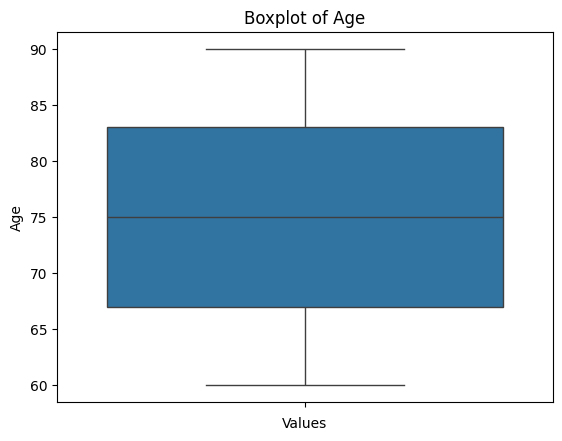

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')
plt.xlabel('Values')
plt.show()


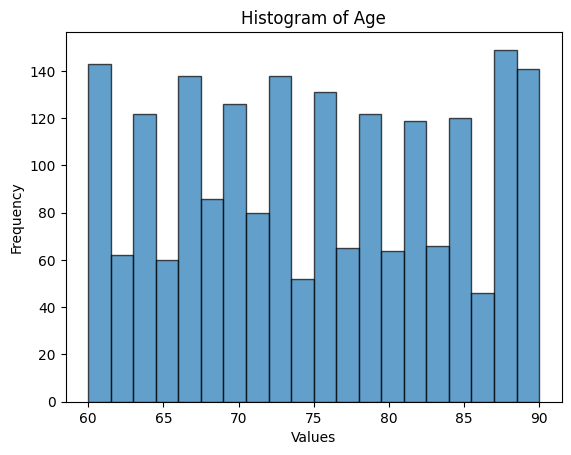

In [28]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [29]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

In [30]:
df.isnull().sum()

Age                            0
Gender                       225
Ethnicity                    226
EducationLevel               228
BMI                          226
Smoking                      223
AlcoholConsumption           223
PhysicalActivity             224
DietQuality                  228
SleepQuality                 227
FamilyHistoryAlzheimers      224
CardiovascularDisease        226
Diabetes                     224
Depression                   225
HeadInjury                   225
Hypertension                 224
SystolicBP                   228
DiastolicBP                  223
CholesterolTotal             228
CholesterolLDL               223
CholesterolHDL               227
CholesterolTriglycerides     226
MMSE                         222
FunctionalAssessment         227
MemoryComplaints             225
BehavioralProblems           227
ADL                          224
Confusion                    227
Disorientation               226
PersonalityChanges           221
Difficulty

***Handling missing value in gender column***

C:\Users\DELL\AppData\Local\Temp\ipykernel_23512\1144527818.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Blues')


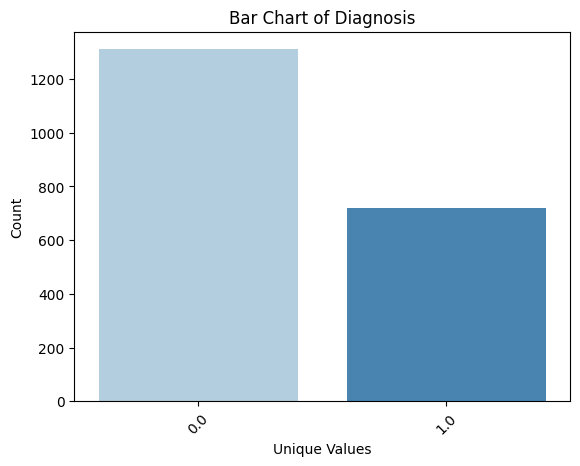

In [31]:
sns.countplot(x='Diagnosis', data=df, palette='Blues')

plt.title('Bar Chart of Diagnosis')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [32]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2251    False
2252    False
2253    False
2254     True
2255     True
Length: 2256, dtype: bool


In [33]:
pd.options.display.max_rows = 9999

In [34]:
df.drop_duplicates(inplace = True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2253
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2204 non-null   float64
 1   Gender                     1984 non-null   float64
 2   Ethnicity                  1983 non-null   float64
 3   EducationLevel             1981 non-null   float64
 4   BMI                        1983 non-null   float64
 5   Smoking                    1982 non-null   float64
 6   AlcoholConsumption         1984 non-null   float64
 7   PhysicalActivity           1984 non-null   float64
 8   DietQuality                1982 non-null   float64
 9   SleepQuality               1983 non-null   float64
 10  FamilyHistoryAlzheimers    1984 non-null   float64
 11  CardiovascularDisease      1983 non-null   float64
 12  Diabetes                   1984 non-null   float64
 13  Depression                 1985 non-null   float

Age                            0
Gender                       220
Ethnicity                    221
EducationLevel               223
BMI                          221
Smoking                      222
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers      220
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_clean = imputer.fit_transform(df[['Diagnosis']])
df_clean


array([[0.35469223],
       [0.        ],
       [0.        ],
       ...,
       [1.        ],
       [1.        ],
       [0.        ]])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23512\4135886592.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Blues')


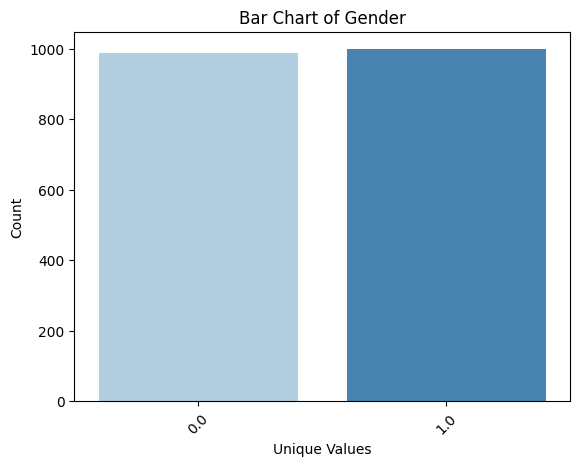

In [36]:
sns.countplot(x='Gender', data=df, palette='Blues')

plt.title('Bar Chart of Gender')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [37]:
df['Diagnosis'].fillna(1, inplace=True)
df['Diagnosis'].isnull().sum()

0

In [38]:
class1 = df[df['Diagnosis'] == 1]['Gender'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Gender'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Gender"])==True:
        df.loc[x,"Gender"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Gender"])==True:
         df.loc[x,"Gender"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                    221
EducationLevel               223
BMI                          221
Smoking                      222
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers      220
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [39]:
class1 = df[df['Diagnosis'] == 1]['Ethnicity'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Ethnicity'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Ethnicity"])==True:
        df.loc[x,"Ethnicity"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Ethnicity"])==True:
         df.loc[x,"Ethnicity"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel               223
BMI                          221
Smoking                      222
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers      220
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [40]:
class1 = df[df['Diagnosis'] == 1]['EducationLevel'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['EducationLevel'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"EducationLevel"])==True:
        df.loc[x,"EducationLevel"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"EducationLevel"])==True:
         df.loc[x,"EducationLevel"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                      222
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers      220
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [41]:
class1 = df[df['Diagnosis'] == 1]['Smoking'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Smoking'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Smoking"])==True:
        df.loc[x,"Smoking"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Smoking"])==True:
         df.loc[x,"Smoking"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers      220
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [42]:
class1 = df[df['Diagnosis'] == 1]['FamilyHistoryAlzheimers'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['FamilyHistoryAlzheimers'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"FamilyHistoryAlzheimers"])==True:
        df.loc[x,"FamilyHistoryAlzheimers"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"FamilyHistoryAlzheimers"])==True:
         df.loc[x,"FamilyHistoryAlzheimers"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease        221
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [43]:
class1 = df[df['Diagnosis'] == 1]['CardiovascularDisease'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['CardiovascularDisease'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CardiovascularDisease"])==True:
        df.loc[x,"CardiovascularDisease"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CardiovascularDisease"])==True:
         df.loc[x,"CardiovascularDisease"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                     220
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [44]:
class1 = df[df['Diagnosis'] == 1]['Diabetes'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Diabetes'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Diabetes"])==True:
        df.loc[x,"Diabetes"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Diabetes"])==True:
         df.loc[x,"Diabetes"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                   219
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [45]:
class1 = df[df['Diagnosis'] == 1]['Depression'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Depression'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Depression"])==True:
        df.loc[x,"Depression"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Depression"])==True:
         df.loc[x,"Depression"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                   221
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [46]:
class1 = df[df['Diagnosis'] == 1]['HeadInjury'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['HeadInjury'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"HeadInjury"])==True:
        df.loc[x,"HeadInjury"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"HeadInjury"])==True:
         df.loc[x,"HeadInjury"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                 222
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [47]:
class1 = df[df['Diagnosis'] == 1]['Hypertension'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Hypertension'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Hypertension"])==True:
        df.loc[x,"Hypertension"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Hypertension"])==True:
         df.loc[x,"Depression"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                 135
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [48]:
class1 = df[df['Diagnosis'] == 1]['Hypertension'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Hypertension'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Hypertension"])==True:
        df.loc[x,"Hypertension"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Hypertension"])==True:
         df.loc[x,"Hypertension"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints             220
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [49]:
class1 = df[df['Diagnosis'] == 1]['MemoryComplaints'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['MemoryComplaints'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"MemoryComplaints"])==True:
        df.loc[x,"MemoryComplaints"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"MemoryComplaints"])==True:
         df.loc[x,"MemoryComplaints"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems           221
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [50]:
class1 = df[df['Diagnosis'] == 1]['BehavioralProblems'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['BehavioralProblems'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"BehavioralProblems"])==True:
        df.loc[x,"BehavioralProblems"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"BehavioralProblems"])==True:
         df.loc[x,"BehavioralProblems"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                    221
Disorientation               219
PersonalityChanges           218
Difficulty

In [51]:
class1 = df[df['Diagnosis'] == 1]['Confusion'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Confusion'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Confusion"])==True:
        df.loc[x,"Confusion"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Confusion"])==True:
         df.loc[x,"Confusion"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation               219
PersonalityChanges           218
Difficulty

In [52]:
class1 = df[df['Diagnosis'] == 1]['Disorientation'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Disorientation'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Disorientation"])==True:
        df.loc[x,"Disorientation"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Disorientation"])==True:
         df.loc[x,"Disorientation"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges           218
Difficulty

In [53]:
class1 = df[df['Diagnosis'] == 1]['PersonalityChanges'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['PersonalityChanges'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"PersonalityChanges"])==True:
        df.loc[x,"PersonalityChanges"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"PersonalityChanges"])==True:
         df.loc[x,"PersonalityChanges"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [54]:
class1 = df[df['Diagnosis'] == 1]['DifficultyCompletingTasks'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['DifficultyCompletingTasks'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DifficultyCompletingTasks"])==True:
        df.loc[x,"DifficultyCompletingTasks"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DifficultyCompletingTasks"])==True:
         df.loc[x,"DifficultyCompletingTasks"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [55]:
class1 = df[df['Diagnosis'] == 1]['Forgetfulness'].mode()[0]
class0 = df[df['Diagnosis'] == 0]['Forgetfulness'].mode()[0]

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"Forgetfulness"])==True:
        df.loc[x,"Forgetfulness"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"Forgetfulness"])==True:
         df.loc[x,"Forgetfulness"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                          221
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [56]:
class1 = df[df['Diagnosis'] == 1]['BMI'].mean()
class0 = df[df['Diagnosis'] == 0]['BMI'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"BMI"])==True:
        df.loc[x,"BMI"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"BMI"])==True:
         df.loc[x,"BMI"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption           220
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [57]:
class1 = df[df['Diagnosis'] == 1]['AlcoholConsumption'].mean()
class0 = df[df['Diagnosis'] == 0]['AlcoholConsumption'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"AlcoholConsumption"])==True:
        df.loc[x,"AlcoholConsumption"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"AlcoholConsumption"])==True:
         df.loc[x,"AlcoholConsumption"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity             220
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [58]:
class1 = df[df['Diagnosis'] == 1]['PhysicalActivity'].mean()
class0 = df[df['Diagnosis'] == 0]['PhysicalActivity'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"PhysicalActivity"])==True:
        df.loc[x,"PhysicalActivity"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"PhysicalActivity"])==True:
         df.loc[x,"PhysicalActivity"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                  222
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [59]:
class1 = df[df['Diagnosis'] == 1]['DietQuality'].mean()
class0 = df[df['Diagnosis'] == 0]['DietQuality'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DietQuality"])==True:
        df.loc[x,"DietQuality"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DietQuality"])==True:
         df.loc[x,"DietQuality"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                 221
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [60]:
class1 = df[df['Diagnosis'] == 1]['SleepQuality'].mean()
class0 = df[df['Diagnosis'] == 0]['SleepQuality'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"SleepQuality"])==True:
        df.loc[x,"SleepQuality"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"SleepQuality"])==True:
         df.loc[x,"SleepQuality"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                   223
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [61]:
class1 = df[df['Diagnosis'] == 1]['SystolicBP'].mean()
class0 = df[df['Diagnosis'] == 0]['SystolicBP'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"SystolicBP"])==True:
        df.loc[x,"SystolicBP"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"SystolicBP"])==True:
         df.loc[x,"SystolicBP"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                  220
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [62]:
class1 = df[df['Diagnosis'] == 1]['DiastolicBP'].mean()
class0 = df[df['Diagnosis'] == 0]['DiastolicBP'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"DiastolicBP"])==True:
        df.loc[x,"DiastolicBP"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"DiastolicBP"])==True:
         df.loc[x,"DiastolicBP"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal             221
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [63]:
class1 = df[df['Diagnosis'] == 1]['CholesterolTotal'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolTotal'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolTotal"])==True:
        df.loc[x,"CholesterolTotal"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolTotal"])==True:
         df.loc[x,"CholesterolTotal"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL               220
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [64]:
class1 = df[df['Diagnosis'] == 1]['CholesterolLDL'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolLDL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolLDL"])==True:
        df.loc[x,"CholesterolLDL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolLDL"])==True:
         df.loc[x,"CholesterolLDL"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL               222
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [65]:
class1 = df[df['Diagnosis'] == 1]['CholesterolHDL'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolHDL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolHDL"])==True:
        df.loc[x,"CholesterolHDL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolHDL"])==True:
         df.loc[x,"CholesterolHDL"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides     221
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [66]:
class1 = df[df['Diagnosis'] == 1]['CholesterolTriglycerides'].mean()
class0 = df[df['Diagnosis'] == 0]['CholesterolTriglycerides'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"CholesterolTriglycerides"])==True:
        df.loc[x,"CholesterolTriglycerides"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"CholesterolTriglycerides"])==True:
         df.loc[x,"CholesterolTriglycerides"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                         218
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [67]:
class1 = df[df['Diagnosis'] == 1]['MMSE'].mean()
class0 = df[df['Diagnosis'] == 0]['MMSE'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"MMSE"])==True:
        df.loc[x,"MMSE"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"MMSE"])==True:
         df.loc[x,"MMSE"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment         222
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [68]:
class1 = df[df['Diagnosis'] == 1]['FunctionalAssessment'].mean()
class0 = df[df['Diagnosis'] == 0]['FunctionalAssessment'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"FunctionalAssessment"])==True:
        df.loc[x,"FunctionalAssessment"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"FunctionalAssessment"])==True:
         df.loc[x,"FunctionalAssessment"]=class0
df.isnull().sum()

Age                            0
Gender                         0
Ethnicity                      0
EducationLevel                 0
BMI                            0
Smoking                        0
AlcoholConsumption             0
PhysicalActivity               0
DietQuality                    0
SleepQuality                   0
FamilyHistoryAlzheimers        0
CardiovascularDisease          0
Diabetes                       0
Depression                     0
HeadInjury                     0
Hypertension                   0
SystolicBP                     0
DiastolicBP                    0
CholesterolTotal               0
CholesterolLDL                 0
CholesterolHDL                 0
CholesterolTriglycerides       0
MMSE                           0
FunctionalAssessment           0
MemoryComplaints               0
BehavioralProblems             0
ADL                          221
Confusion                      0
Disorientation                 0
PersonalityChanges             0
Difficulty

In [69]:
class1 = df[df['Diagnosis'] == 1]['ADL'].mean()
class0 = df[df['Diagnosis'] == 0]['ADL'].mean()

for x in df.index:
    if df.loc[x,"Diagnosis"]==1 and pd.isnull(df.loc[x,"ADL"])==True:
        df.loc[x,"ADL"]=class1
    elif df.loc[x,"Diagnosis"]==0 and pd.isnull(df.loc[x,"ADL"])==True:
         df.loc[x,"ADL"]=class0
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [70]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,75.0,0.0,0.0,2.0,22.927749,0.0,13.297218,6.327112,1.347214,9.025679,...,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,1.0,XXXCONFID
1,89.0,0.0,0.0,0.0,26.827681,0.0,4.542524,7.619885,0.518767,7.103023,...,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0.0,XlXCONFID
2,73.0,0.0,3.0,1.0,17.795882,0.0,19.555085,4.855976,1.826335,9.673574,...,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0.0,xxxconfid
3,75.0,1.0,0.0,1.0,33.800817,1.0,12.209266,8.428001,7.435604,8.392554,...,0.0,0.0,6.481226,0.0,0.0,0.0,0.0,0.0,1.0,xxxconfid
4,89.0,0.0,0.0,0.0,20.716974,0.0,18.454356,6.310461,0.795498,5.597238,...,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0.0,XXXCONFID


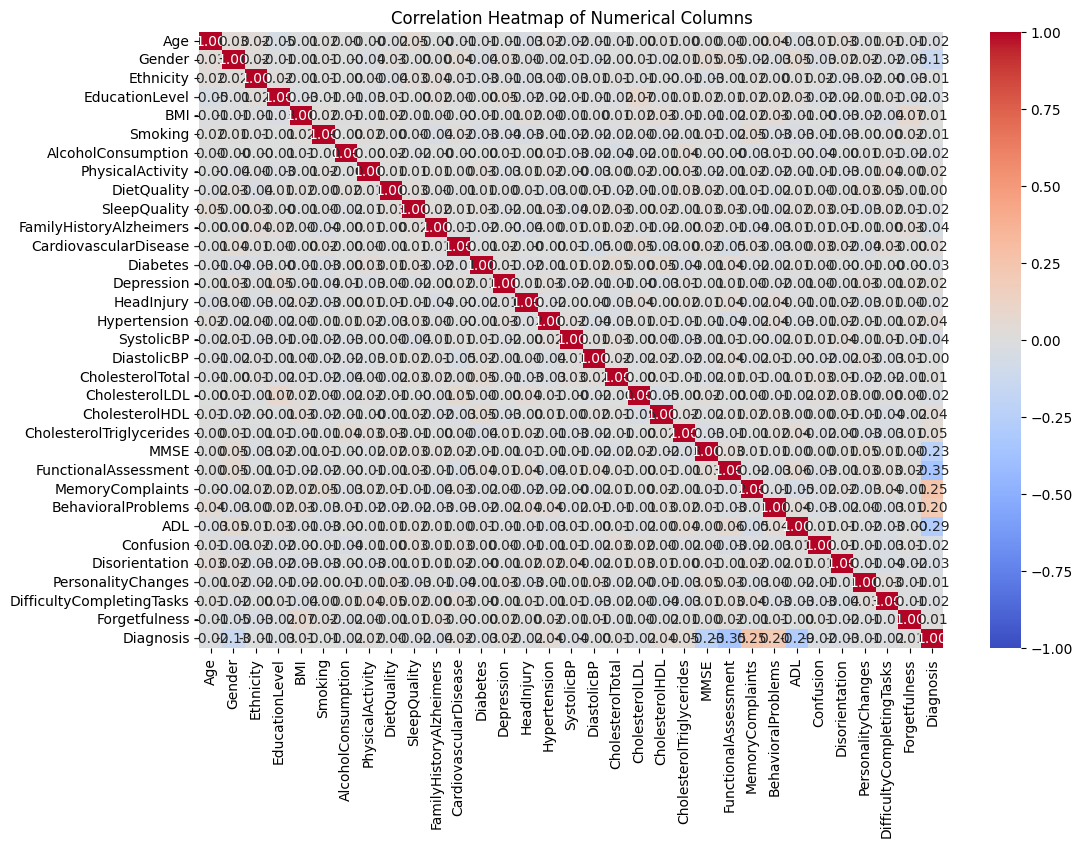

In [73]:
df_numeric = df.select_dtypes(include=['float', 'int'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
!pip install dataprep


In [ ]:
create_report(df).save()

In [ ]:
df.info()